# Importe modules

In [2]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns

# Read amip-piForcing : radiative budget, tas

## First model : CNRM-CM6-1

In [24]:
#------------- CNRM_amip : open files and read variables ----------------------
#
path_amip = "/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/"
filename_amipCTL = "*_amip-piForcing_*.nc"
file_amipCTL = xr.open_mfdataset(path_amip+filename_amipCTL,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_amipCTL=file_amipCTL[variables].to_dataframe().drop('height',axis=1)
df1_amipCTL=df_amipCTL.reset_index(level=['time'])
df1_amipCTL['year']=pd.DatetimeIndex(df1_amipCTL['time']).year
amip_CTL=df1_amipCTL.groupby(['year']).mean()
amip_CTL

,rlut,rsut,rsdt,tas
year,,,,
1870,223.725830,103.911697,298.951080,277.275330
1871,223.738297,103.664124,298.951904,277.342285
1872,223.750626,103.670815,299.023926,277.384857
1873,223.844925,103.754616,298.950226,277.331146
1874,223.465515,103.960541,298.951080,277.144165
...,...,...,...,...
2010,225.047501,103.597878,298.951080,278.120728
2011,224.794678,103.102051,298.951904,278.024933
2012,225.122086,103.167130,299.023926,278.249817


In [30]:
# Compute radiative budget 
amip_CTL['F']=amip_CTL['rsdt']
amip_CTL['H']=amip_CTL['rsut']+amip_CTL['rlut']
amip_CTL['N']=amip_CTL['F']-amip_CTL['H']

# reshape
year_list=range(1870,1960,1)
yrlist=range(1990,2015,1)
amipCTL=amip_CTL.drop(year_list).drop(yrlist).reset_index(level=['year']).drop(axis=1,columns='year')
amipCTL

,rlut,rsut,rsdt,tas,F,H,N
0,224.238541,103.563385,299.023926,277.663483,299.023926,327.801941,-28.778015
1,224.061737,103.454124,298.950226,277.610718,298.950226,327.515869,-28.565643
2,224.297180,103.527657,298.951080,277.613373,298.951080,327.824829,-28.873749
3,224.066559,103.592354,298.951904,277.519257,298.951904,327.658905,-28.707001
4,223.819077,103.706123,299.023926,277.407562,299.023926,327.525208,-28.501282
5,223.708496,103.721046,298.950226,277.403442,298.950226,327.429535,-28.479309
6,224.215012,103.516342,298.951080,277.582123,298.951080,327.731354,-28.780273
7,224.158035,103.636307,298.951904,277.488251,298.951904,327.794342,-28.842438
8,224.110550,103.680115,299.023926,277.573730,299.023926,327.790649,-28.766724
9,224.403549,103.920273,298.950226,277.779633,298.950226,328.323822,-29.373596


In [19]:
#------------- CNRM_SST : open files and read variables ----------------------
#
path_sst = "/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/SST/"
filename_sstCTL = "*_piSST_*.nc"
file_sstCTL = xr.open_mfdataset(path_sst+filename_sstCTL,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_sstCTL=file_sstCTL[variables].to_dataframe().drop('height',axis=1)
df1_sstCTL=df_sstCTL.reset_index(level=['time'])
df1_sstCTL['year']=pd.DatetimeIndex(df1_sstCTL['time']).year
sst_CTL=df1_sstCTL.groupby(['year']).mean()
sst_CTL

,rlut,rsut,rsdt,tas
year,,,,
1960,222.780289,103.837746,299.023926,276.823395
1961,222.778076,103.530807,298.950226,276.830444
1962,222.928391,103.614792,298.951080,276.962708
1963,223.370270,103.442223,298.951904,277.068451
1964,223.093811,103.604958,299.023926,276.908875
1965,223.239777,103.192818,298.950226,277.143646
1966,223.218094,103.509811,298.951080,277.172241
1967,223.075638,103.908310,298.951904,276.952728
1968,222.946167,103.911705,299.023926,276.876373


In [20]:
# Compute radiative budget 
sst_CTL['F']=sst_CTL['rsdt']
sst_CTL['H']=sst_CTL['rsut']+sst_CTL['rlut']
sst_CTL['N']=sst_CTL['F']-sst_CTL['H']

# reshape
sstCTL=sst_CTL.reset_index(level=['year']).drop(axis=1,columns='year')
sstCTL

,rlut,rsut,rsdt,tas,F,H,N
0,222.780289,103.837746,299.023926,276.823395,299.023926,326.618042,-27.594116
1,222.778076,103.530807,298.950226,276.830444,298.950226,326.308899,-27.358673
2,222.928391,103.614792,298.951080,276.962708,298.951080,326.543182,-27.592102
3,223.370270,103.442223,298.951904,277.068451,298.951904,326.812500,-27.860596
4,223.093811,103.604958,299.023926,276.908875,299.023926,326.698761,-27.674835
5,223.239777,103.192818,298.950226,277.143646,298.950226,326.432587,-27.482361
6,223.218094,103.509811,298.951080,277.172241,298.951080,326.727905,-27.776825
7,223.075638,103.908310,298.951904,276.952728,298.951904,326.983948,-28.032043
8,222.946167,103.911705,299.023926,276.876373,299.023926,326.857880,-27.833954
9,223.110077,103.424149,298.950226,276.870087,298.950226,326.534241,-27.584015


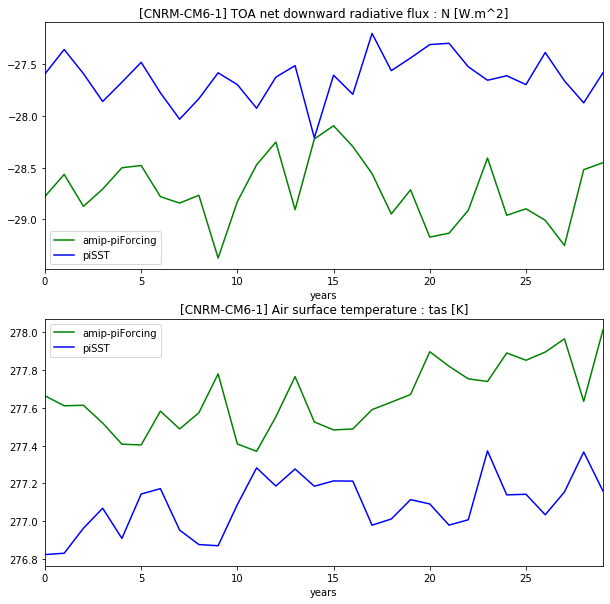

In [35]:
# Create plot of radiative budget
plt.subplot(211)
ax=plt.gca()
amipCTL.plot(y='N',kind='line',title='[CNRM-CM6-1] TOA net downward radiative flux : N [W.m^2]',legend=True, color='green',figsize=(10,10),ax=ax)
sstCTL.plot(y='N',kind='line',legend=True, color='blue',ax=ax)
plt.xlabel('years')
ax.legend(['amip-piForcing','piSST'])
#
# tas
plt.subplot(212)
ax1=plt.gca()
amipCTL.plot(y='tas',kind='line',title='[CNRM-CM6-1] Air surface temperature : tas [K]',legend=True, color='green',figsize=(10,10),ax=ax1)
sstCTL.plot(y='tas',kind='line',legend=True, color='blue',ax=ax1)
plt.xlabel('years')
ax1.legend(['amip-piForcing','piSST'])

# Read amip-p4xCO2 : radiative budget, tas

In [46]:
#------------- CNRM_amip : open files and read variables ----------------------
#
filename_amip4xCO2 = "*_amip-4xCO2_*.nc"
file_amip4xCO2 = xr.open_mfdataset(path_amip+filename_amip4xCO2,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_amip4xCO2=file_amip4xCO2[variables].to_dataframe().drop('height',axis=1)
df1_amip4xCO2=df_amip4xCO2.reset_index(level=['time'])
df1_amip4xCO2['year']=pd.DatetimeIndex(df1_amip4xCO2['time']).year
amip_4xCO2=df1_amip4xCO2.groupby(['year']).mean()
amip_4xCO2

,rlut,rsut,rsdt,tas
year,,,,
1979,218.133591,101.930840,299.138092,278.576202
1980,218.016190,102.276932,299.196655,278.555878
1981,218.138962,102.029541,299.127747,278.678223
1982,218.102112,102.246330,299.053345,278.502838
1983,217.914764,102.651436,299.051910,278.629791
1984,218.183029,101.771042,299.036072,278.725861
1985,217.695129,102.124008,298.933105,278.471924
1986,217.764694,102.159157,298.937439,278.602478
1987,218.235733,102.117310,298.956879,278.864166


In [50]:
# Compute radiative budget 
amip_4xCO2['F']=amip_4xCO2['rsdt']
amip_4xCO2['H']=amip_4xCO2['rsut']+amip_4xCO2['rlut']
amip_4xCO2['N']=amip_4xCO2['F']-amip_4xCO2['H']

# reshape
year_list=range(2008,2014,1)
amip4xCO2=amip_4xCO2.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
amip4xCO2

,rlut,rsut,rsdt,tas,F,H,N
0,218.133591,101.930840,299.138092,278.576202,299.138092,320.064423,-20.926331
1,218.016190,102.276932,299.196655,278.555878,299.196655,320.293121,-21.096466
2,218.138962,102.029541,299.127747,278.678223,299.127747,320.168518,-21.040771
3,218.102112,102.246330,299.053345,278.502838,299.053345,320.348450,-21.295105
4,217.914764,102.651436,299.051910,278.629791,299.051910,320.566193,-21.514282
5,218.183029,101.771042,299.036072,278.725861,299.036072,319.954071,-20.917999
6,217.695129,102.124008,298.933105,278.471924,298.933105,319.819153,-20.886047
7,217.764694,102.159157,298.937439,278.602478,298.937439,319.923859,-20.986420
8,218.235733,102.117310,298.956879,278.864166,298.956879,320.353027,-21.396149
9,218.024353,101.966347,299.106628,278.672028,299.106628,319.990692,-20.884064


In [39]:
#------------- CNRM_SST : open files and read variables ----------------------
#
filename_sst4xCO2 = "*_piSST-4xCO2_*.nc"
file_sst4xCO2 = xr.open_mfdataset(path_sst+filename_sst4xCO2,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_sst4xCO2=file_sst4xCO2[variables].to_dataframe().drop('height',axis=1)
df1_sst4xCO2=df_sst4xCO2.reset_index(level=['time'])
df1_sst4xCO2['year']=pd.DatetimeIndex(df1_sst4xCO2['time']).year
sst_4xCO2=df1_sst4xCO2.groupby(['year']).mean()
sst_4xCO2

,rlut,rsut,rsdt,tas
year,,,,
1960,217.762192,101.597588,299.023926,277.579529
1961,217.899643,101.538696,298.950226,277.565338
1962,217.996429,101.142395,298.951080,277.737366
1963,218.659729,101.021667,298.951904,278.044586
1964,218.212067,101.411201,299.023926,277.761414
1965,218.609833,101.153389,298.950226,277.840302
1966,218.364639,101.098778,298.951080,277.851562
1967,218.604385,101.189087,298.951904,278.011292
1968,218.029739,101.301735,299.023926,277.765686


In [40]:
# Compute radiative budget 
sst_4xCO2['F']=sst_4xCO2['rsdt']
sst_4xCO2['H']=sst_4xCO2['rsut']+sst_4xCO2['rlut']
sst_4xCO2['N']=sst_4xCO2['F']-sst_4xCO2['H']
sst4xCO2=sst_4xCO2.reset_index(level=['year']).drop(axis=1,columns='year')
sst4xCO2

,rlut,rsut,rsdt,tas,F,H,N
0,217.762192,101.597588,299.023926,277.579529,299.023926,319.359772,-20.335846
1,217.899643,101.538696,298.950226,277.565338,298.950226,319.438354,-20.488129
2,217.996429,101.142395,298.951080,277.737366,298.951080,319.138824,-20.187744
3,218.659729,101.021667,298.951904,278.044586,298.951904,319.681396,-20.729492
4,218.212067,101.411201,299.023926,277.761414,299.023926,319.623260,-20.599335
5,218.609833,101.153389,298.950226,277.840302,298.950226,319.763214,-20.812988
6,218.364639,101.098778,298.951080,277.851562,298.951080,319.463409,-20.512329
7,218.604385,101.189087,298.951904,278.011292,298.951904,319.793457,-20.841553
8,218.029739,101.301735,299.023926,277.765686,299.023926,319.331482,-20.307556
9,217.836044,101.474396,298.950226,277.507233,298.950226,319.310425,-20.360199


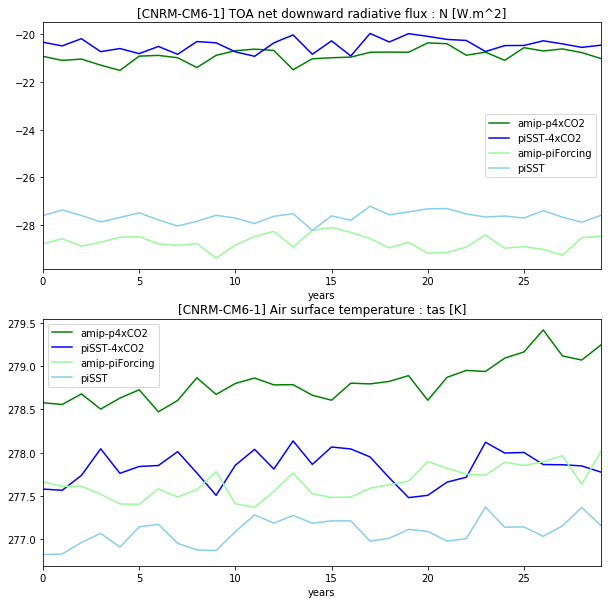

In [57]:
# Create plot of radiative budget
plt.subplot(211)
ax=plt.gca()
amip4xCO2.plot(y='N',kind='line',title='[CNRM-CM6-1] TOA net downward radiative flux : N [W.m^2]',legend=True, color='green',figsize=(10,10),ax=ax)
sst4xCO2.plot(y='N',kind='line',legend=True, color='blue',ax=ax)
amipCTL.plot(y='N',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax)
sstCTL.plot(y='N',kind='line',legend=True, color='skyblue',ax=ax)
plt.xlabel('years')
ax.legend(['amip-p4xCO2','piSST-4xCO2','amip-piForcing','piSST'])
#
# tas
plt.subplot(212)
ax1=plt.gca()
amip4xCO2.plot(y='tas',kind='line',title='[CNRM-CM6-1] Air surface temperature : tas [K]',legend=True, color='green',figsize=(10,10),ax=ax1)
sst4xCO2.plot(y='tas',kind='line',legend=True, color='blue',ax=ax1)
amipCTL.plot(y='tas',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax1)
sstCTL.plot(y='tas',kind='line',legend=True, color='skyblue',ax=ax1)
plt.xlabel('years')
ax1.legend(['amip-p4xCO2','piSST-4xCO2','amip-piForcing','piSST'])

# Compute : Delta(TOA), Delta(tas), Lambda

In [7]:
result = pd.DataFrame()

i=0
N=len(df)
Lbda=[]
DN=[]
Dtas=[]
while i<N:
    ctl_tmp=ctl.iloc[0:i,:]
    df_tmp=df.iloc[0:i,:]
    Delta_N=df_tmp['N'].mean()-ctl_tmp['N'].mean()
    Delta_tas=df_tmp['tas'].mean()-ctl_tmp['tas'].mean()
    Lambda=Delta_N/Delta_tas
    Lbda.append(Lambda)
    DN.append(Delta_N)
    Dtas.append(Delta_tas)
    i=i+1
 
result['Delta_N']=DN
result['Delta_tas']=Dtas
result['Lambda']=Lbda
result

,Delta_N,Delta_tas,Lambda
0,NaN,NaN,NaN
1,8.020996,0.946381,8.475444
2,7.819580,0.915894,8.537652
3,7.923178,0.871094,9.095666
4,7.901932,0.824036,9.589308
5,7.801214,0.834534,9.347992
6,7.749226,0.859863,9.012160
7,7.795650,0.820190,9.504683
8,7.810085,0.811523,9.623980
9,7.788097,0.829071,9.393764


In [8]:
# Calculer Lambda moyen à partir de la convergence

#Lam10=Lbda[10:35]
#Lb10=mean(Lam10)
#Lb10

Lam15=Lbda[15:35]
Lb15=mean(Lam15)
Lb15

#Lam20=Lbda[20:35]
#Lb20=mean(Lam20)
#Lb20

9.735036

# Create plots

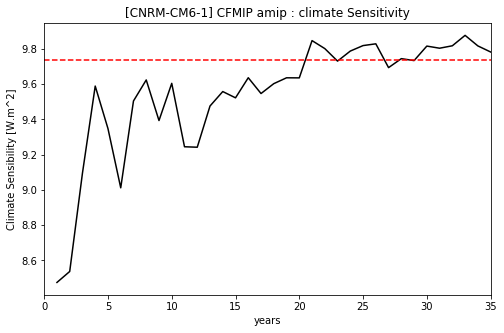

In [25]:
# Plot rsdt
#plt.subplot(221)
#ax0=plt.gca()
#ctl.plot(y='rsdt',kind='line',title='[CNRM-CM6-1] CFMIP amip : rsdt [W.m^2]',legend=True, color='Gray',figsize=(10,10),ax=ax0)
#df.plot(y='rsdt',kind='line',legend=True, color='Black',ax=ax0)
#plt.xlabel('years')
#plt.legend(['piForcing','4xCO2'])

# Plot rlut
#plt.subplot(222)
#ax1=plt.gca()
#ctl.plot(y='rlut',kind='line',title='[CNRM-CM6-1] CFMIP amip : rlut [W.m^2]',legend=True, color='Gray',figsize=(10,10),ax=ax1)
#df.plot(y='rlut',kind='line',legend=True, color='Black',ax=ax1)
#plt.xlabel('years')
#plt.legend(['piForcing','4xCO2'])

# Plot rsut
#plt.subplot(223)
#ax2=plt.gca()
#ctl.plot(y='rsut',kind='line',title='[CNRM-CM6-1] CFMIP amip : rsut [W.m^2]',legend=True, color='Gray',figsize=(10,10),ax=ax2)
#df.plot(y='rsut',kind='line',legend=True, color='Black',ax=ax2)
#plt.xlabel('years')
#ax2.legend(['piForcing','4xCO2'])

# Plot TOA
#plt.subplot(224)
#ax=plt.gca()
#ctl.plot(y='N',kind='line',title='[CNRM-CM6-1] CFMIP amip : N [W.m^2]',legend=True, color='Gray',figsize=(10,10),ax=ax)
#df.plot(y='N',kind='line',legend=True, color='Black',ax=ax)
#plt.xlabel('years')
#ax.legend(['piForcing','4xCO2'])

#Ajustement des subplots
#plt.tight_layout()
#plt.subplots_adjust(hspace = 0.30)

# Plot the different variables amip-4xCO2
#p4K.plot(y='rsut',kind='line',title='[CNRM-CM6-1] CFMIP amip-p4K : rsut [W.m^2]',legend=False)
#p4K.plot(y='rlut',kind='line',title='[CNRM-CM6-1] CFMIP amip-p4K : rlut [W.m^2]',legend=False)
#p4K.plot(y='TOA',kind='line',title='[CNRM-CM6-1] CFMIP amip-p4K : TOA',legend=False)
#df.plot(y='tas',kind='line',title='[CNRM-CM6-1] CFMIP amip-4xCO2 : tas [Kelvin]',legend=False)
#df.plot(y='N',kind='line',title='[CNRM-CM6-1] CFMIP amip-4xCO2 : N [W.m^2]',legend=False)
#p4K.plot(y='TOA',kind='line',title='[CNRM-CM6-1] CFMIP amip-p4K : TOA [W.m^2]',legend=False)

# Plot TOA VS tas 
#sns.lmplot(x='tas',y='N',data=df,fit_reg=True)
#sns.lmplot(x='tas',y='N',data=ctl,fit_reg=True)
#sns.lmplot(x='Delta_tas',y='Delta_N',data=result,fit_reg=True)
#ctl.plot(x='tas',y='TOA',kind='scatter',title='[CNRM-CM6-1] CFMIP amip-piForcing',legend=False)
#p4K.plot(x='tas',y='TOA',kind='scatter',title='[CNRM-CM6-1] CFMIP amip-p4K',legend=False)

#Plot result
ax=plt.gca()
result.plot(y='Lambda',kind='line',color='black',title='[CNRM-CM6-1] CFMIP amip : climate Sensitivity',legend=False,figsize=(8,5),ax=ax)
#ax.axhline(y=Lb10, xmin=0, xmax=36, ls='--', color='green')
ax.axhline(y=Lb15, xmin=0, xmax=36, ls='--', color='red')
#ax.axhline(y=Lb20, xmin=0, xmax=36, ls='--', color='blue')
ax.set_xlabel('years')
ax.set_ylabel('Climate Sensibility [W.m^2]')
#result.plot(y='Delta_N',kind='line',title='[CNRM-CM6-1] CFMIP amip',legend=True)
#result.plot(y='Delta_tas',kind='line',title='[CNRM-CM6-1] CFMIP amip',legend=True)

plt.show()